# Добрый вечер!

Сегодня внепланово изучим возможности одной из наиболее часто используемой дата-саентистами библиотеки `pandas`.

Есть классная шпаргалка http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [2]:
import pandas as pd

Версию модуля можно посмотреть в атрибуте `__version__`

In [2]:
pd.__version__

'1.3.5'

### Структуры данных в Пандасе

Для работы с даннами в pandas есть две основные структуры данных: `Series` и `DataFrame`.

### Series

`Series` - это одномерная маркированная структура данных, состоит из _индекса_ и _элементов_.

https://pandas.pydata.org/pandas-docs/stable/reference/series.html

#### Создание объекта Series

In [7]:
# создаем объект Series

first_series = pd.Series(data=[111, 222, 333])

print(first_series)

0    111
1    222
2    333
dtype: int64


In [4]:
type(first_series)

pandas.core.series.Series

In [5]:
print([111, 222, 333])

[111, 222, 333]


In [6]:
# печатаем информацию про Series

print("Размер Series:", first_series.shape)
print("Индекс Series:", first_series.index)
print("Значения Series:", first_series.values)

Размер Series: (3,)
Индекс Series: RangeIndex(start=0, stop=3, step=1)
Значения Series: [111 222 333]


В примере выше мы не задали явно индекс, поэтому автоматически был создан индекс от 0 до 2.

In [8]:
second_series = pd.Series(data=[1, 2, 3], index=['a', 'b', 'c'])

print(second_series)

a    1
b    2
c    3
dtype: int64


In [9]:
# печатаем информацию про Series

print("Размер Series:", second_series.shape)
print("Индекс Series:", second_series.index)
print("Значения Series:", second_series.values)

Размер Series: (3,)
Индекс Series: Index(['a', 'b', 'c'], dtype='object')
Значения Series: [1 2 3]


Аналогично, можно создать с помощью словаря `{index : value}`:

In [10]:
third_series = pd.Series({'a': 1, 'b': 2, 'c': 3})

print(third_series)

a    1
b    2
c    3
dtype: int64


Доступ к элементам `Series` возможен по их индексу (по аналогии со словарем)

In [11]:
# с порядковым индексом

first_series = pd.Series([1, 2, 3])

print(first_series[1])

2


In [13]:
# c кастомным индексом
second_series = pd.Series([111, 222, 333], index=['a', 'b', 'c'])

print(second_series)
print()
#так 
print(second_series['b'])

#или вот так

print(second_series[1])

a    111
b    222
c    333
dtype: int64

222
222


In [3]:
second_series = pd.Series([1, 2, 3], index=[3, 4, 5])
second_series

3    1
4    2
5    3
dtype: int64

In [6]:
second_series[5]  # KeyError

3

Здесь нужно усвоить 3 вещи: 

1. Как создаются Series
2. Series состоят из индекса и значений
3. Доступ к элементу осуществляется либо по индексу, либо по порядковому номеру

#### Операции

Доступны арифметические операции и операции сравнения

In [16]:
# зададим 2 объекта Series

s1 = pd.Series(0.1, index=range(5))
s2 = pd.Series(range(10, 15))

print(s1)
print(s2)

0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
dtype: float64
0    10
1    11
2    12
3    13
4    14
dtype: int64


In [17]:
# например, деление

print(s1 / s2)

0    0.010000
1    0.009091
2    0.008333
3    0.007692
4    0.007143
dtype: float64


In [18]:
s1 = pd.Series(0.1, index=range(5))
s2 = pd.Series(range(10, 15), index=range(10, 15))

print(s1)
print(s2)

0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
dtype: float64
10    10
11    11
12    12
13    13
14    14
dtype: int64


In [19]:
print(s1 / s2)  # NaN --> Not A Number

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
dtype: float64


In [20]:
type(float('nan')), type(float('inf'))

(float, float)

In [8]:
# починим серии
s1 = pd.Series(0.1, index=range(5))
s2 = pd.Series(range(10, 15))

print(s1)
print(s2)

0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
dtype: float64
0    10
1    11
2    12
3    13
4    14
dtype: int64


In [9]:
# например, больше

print(s1 > s2)

0    False
1    False
2    False
3    False
4    False
dtype: bool


#### Индексация / slicing

In [11]:
series = pd.Series([0, 1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e', 'f'])

In [12]:
print(series)

a    0
b    1
c    2
d    3
e    4
f    5
dtype: int64


Slicing как со списком:

In [25]:
series[-1:-4:-1]

f    5
e    4
d    3
dtype: int64

Или по индексу series:

In [26]:
series['d':'a':-1]

d    3
c    2
b    1
a    0
dtype: int64

Или по условному выражению!

In [27]:
series > 3

a    False
b    False
c    False
d    False
e     True
f     True
dtype: bool

In [28]:
# по булевым маскам можно выбирать нужные данные!
series[series > 3]

e    4
f    5
dtype: int64

In [36]:
dir()

['In',
 'Out',
 '_',
 '_14',
 '_2',
 '_20',
 '_25',
 '_26',
 '_27',
 '_28',
 '_29',
 '_32',
 '_33',
 '_34',
 '_35',
 '_4',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'df',
 'exit',
 'first_series',
 'get_ipython',
 'pd',
 'quit',
 's1',
 's2',
 'second_series',
 'series',
 'third_series']

In [13]:
print(*[name for name in dir(series) if not name.startswith('_')], sep='\n')

T
a
abs
add
add_prefix
add_suffix
agg
aggregate
align
all
any
append
apply
argmax
argmin
argsort
array
asfreq
asof
astype
at
at_time
attrs
autocorr
axes
b
backfill
between
between_time
bfill
bool
c
clip
combine
combine_first
compare
convert_dtypes
copy
corr
count
cov
cummax
cummin
cumprod
cumsum
d
describe
diff
div
divide
divmod
dot
drop
drop_duplicates
droplevel
dropna
dtype
dtypes
duplicated
e
empty
eq
equals
ewm
expanding
explode
f
factorize
ffill
fillna
filter
first
first_valid_index
flags
floordiv
ge
get
groupby
gt
hasnans
head
hist
iat
idxmax
idxmin
iloc
index
infer_objects
info
interpolate
is_monotonic
is_monotonic_decreasing
is_monotonic_increasing
is_unique
isin
isna
isnull
item
items
iteritems
keys
kurt
kurtosis
last
last_valid_index
le
loc
lt
mad
map
mask
max
mean
median
memory_usage
min
mod
mode
mul
multiply
name
nbytes
ndim
ne
nlargest
notna
notnull
nsmallest
nunique
pad
pct_change
pipe
plot
pop
pow
prod
product
quantile
radd
rank
ravel
rdiv
rdivmod
reindex
reindex_like
re

### DataFrame

DataFrame - это двумерная структура данных, табличка с множеством строк и столбцов.

Столбцы - это Series.

#### Создание объекта

In [16]:
# создаем DataFrame со столбцами [person, age, sex]
# с индексами [a, b, c]

df = pd.DataFrame({'person': ['Masha', 'Ivan', 'Cat'],
                   'age': [18, 21, 3],
                   'sex': ['F', 'M', 'M']}, 
                  index=['a', 'b', 'c']
)

df

,person,age,sex
a,Masha,18,F
b,Ivan,21,M
c,Cat,3,M


Каждый столбец DataFrame - это объект Series

In [19]:
print(type(df), type(df['age']), sep='\n')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [31]:
print(df['person'])

a    Masha
b     Ivan
c      Cat
Name: person, dtype: object


In [26]:
# печатаем информацию про DataFrame

print("Размер DataFrame:", df.shape)
print("Индекс DataFrame:", df.index)
print("Столбцы DataFrame:", df.columns)
print("Значения DataFrame:")
print(df.values)
df.values

Размер DataFrame: (3, 3)
Индекс DataFrame: Index(['a', 'b', 'c'], dtype='object')
Столбцы DataFrame: Index(['person', 'age', 'sex'], dtype='object')
Значения DataFrame:
[['Masha' 18 'F']
 ['Ivan' 21 'M']
 ['Cat' 3 'M']]


array([['Masha', 18, 'F'],
       ['Ivan', 21, 'M'],
       ['Cat', 3, 'M']], dtype=object)

In [39]:
print(*[name for name in dir(df) if not name.startswith('_')], sep='\n')

T
abs
add
add_prefix
add_suffix
age
agg
aggregate
align
all
any
append
apply
applymap
asfreq
asof
assign
astype
at
at_time
attrs
axes
backfill
between_time
bfill
bool
boxplot
clip
columns
combine
combine_first
compare
convert_dtypes
copy
corr
corrwith
count
cov
cummax
cummin
cumprod
cumsum
describe
diff
div
divide
dot
drop
drop_duplicates
droplevel
dropna
dtypes
duplicated
empty
eq
equals
eval
ewm
expanding
explode
ffill
fillna
filter
first
first_valid_index
flags
floordiv
from_dict
from_records
ge
get
groupby
gt
head
hist
iat
idxmax
idxmin
iloc
index
infer_objects
info
insert
interpolate
isin
isna
isnull
items
iteritems
iterrows
itertuples
join
keys
kurt
kurtosis
last
last_valid_index
le
loc
lookup
lt
mad
mask
max
mean
median
melt
memory_usage
merge
min
mod
mode
mul
multiply
ndim
ne
nlargest
notna
notnull
nsmallest
nunique
pad
pct_change
person
pipe
pivot
pivot_table
plot
pop
pow
prod
product
quantile
query
radd
rank
rdiv
reindex
reindex_like
rename
rename_axis
reorder_levels
replace


#### Индексация

##### []

In [40]:
# создаем DataFrame со столбцами [person, age, sex]
# с индексами [a, b, c]

df = pd.DataFrame({'person': ['Masha', 'Ivan', 'Cat'],
                   'age': [18, 21, 3],
                   'sex': ['F', 'M', 'M']}, 
                  index=['a', 'b', 'c']
)

df

,person,age,sex
a,Masha,18,F
b,Ivan,21,M
c,Cat,3,M


In [52]:
df[0:2]

,person,age,sex
a,Masha,18,F
b,Ivan,21,M


In [30]:
df['person'][0:2]

a    Masha
b     Ivan
Name: person, dtype: object

In [31]:
df[0:2]['person', 'sex']

KeyError: ('person', 'sex')

Порядок важен!

In [55]:
df['a':'b'][['person', 'sex']]

,person,sex
a,Masha,F
b,Ivan,M


In [33]:
df['b':'a':-1][['sex', 'person']]

,sex,person
b,M,Ivan
a,F,Masha


##### .loc

Выбор элементов по индексу

In [65]:
df = pd.DataFrame({
    'person': ['Masha', 'Ivan', 'Cat'],
    'age': [18, 21, 3],
    'sex': ['F', 'M', 'M']
}, index=['a', 'b', 'c']
)

df

,person,age,sex
a,Masha,18,F
b,Ivan,21,M
c,Cat,3,M


In [34]:
df.loc[0:2, 0]  # [0:2][0]

KeyError: 0

In [37]:
# обратите внимание, что правый конец включен

df.loc['a':'b',['person', 'sex']]

,person,sex
a,Masha,F
b,Ivan,M


Передавать можно:

- метку
- список меток
- slice (правый конец включен)
- булевский массив

In [40]:
df.loc[df['age'] > 18, 'sex']

b    M
Name: sex, dtype: object

In [43]:
type(df.loc[df['age'] > 18, 'person'])

pandas.core.series.Series

In [44]:
df.loc[df['age'] > 18, ['person']]

,person
b,Ivan


In [45]:
type(df.loc[df['age'] > 18, ['person']])

pandas.core.frame.DataFrame

##### .iloc

Индексация по позиции от `0` до `len - 1` в каждой размерности (сначала индекс строк, затем столбцов)

In [46]:
df = pd.DataFrame({
    'person': ['Masha', 'Ivan', 'Cat'],
    'age': [18, 21, 3],
    'sex': ['F', 'M', 'M']
}, index=['a', 'b', 'c']
)

df

,person,age,sex
a,Masha,18,F
b,Ivan,21,M
c,Cat,3,M


In [73]:
# обратите внимание, что правый конец не включен!

df.iloc[0:2, 0:2]

,person,age
a,Masha,18
b,Ivan,21


Передавать можно:

- integer
- список integer
- slice с integer (правый конец не включен)
- булевский массив

In [47]:
df > 18

TypeError: '>' not supported between instances of 'str' and 'int'

In [48]:
df['age'] > 18

a    False
b     True
c    False
Name: age, dtype: bool

In [49]:
df.iloc[df['age'] > 18]  # ValueError

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [78]:
(df['age'] > 18).values

array([False,  True, False])

In [50]:
df

,person,age,sex
a,Masha,18,F
b,Ivan,21,M
c,Cat,3,M


In [77]:
# Починим
df.iloc[(df['age'] > 18).values]

,person,age,sex
b,Ivan,21,M


## Изучаем Pandas на примере

In [2]:
import pandas as pd

# библиотека для визуализации
import matplotlib.pyplot as plt

# команда, чтоб графики прям в ноутбуке выводились
%matplotlib inline

### Загрузка данных

Pandas предоставляет встроенные методы для считывания из разных форматов.

Так, есть .read_excel, .read_json, .read_picke и т.д.

In [ ]:
# pd.read_

In [3]:
museums = pd.read_csv('museums.csv', low_memory=False)

states_info = pd.read_csv('states_info.csv', sep=";")

Посмотрим на данные. 

Для этого есть 2 основные функции:

    .head(N) 
    .tail(N)

N - кол-во строк, которые хочется вывести.

In [61]:
museums.head()

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,61.16890,-149.76708,4.0,20.0,2.0,6,920115504,201312.0,1379576.0,1323742.0
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,60.56149,-151.21598,3.0,122.0,2.0,6,921761906,201312.0,740030.0,729080.0
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,...,60.56280,-151.26597,3.0,122.0,2.0,6,920165178,201412.0,0.0,0.0
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0


In [58]:
states_info.tail(3)

,State,ShortName,Capital
47,West Virginia (Западная Вирджиния),WV,Charleston
48,Wisconsin (Висконсин),WI,Madison
49,Wyoming (Вайоминг),WY,Cheyenne


### Удаление столбцов

Посмотрим на столбцы

In [84]:
museums.columns

Index(['Museum ID', 'Museum Name', 'Legal Name', 'Alternate Name',
       'Museum Type', 'Institution Name',
       'Street Address (Administrative Location)',
       'City (Administrative Location)', 'State (Administrative Location)',
       'Zip Code (Administrative Location)',
       'Street Address (Physical Location)', 'City (Physical Location)',
       'State (Physical Location)', 'Zip Code (Physical Location)',
       'Phone Number', 'Latitude', 'Longitude', 'Locale Code (NCES)',
       'County Code (FIPS)', 'State Code (FIPS)', 'Region Code (AAM)',
       'Employer ID Number', 'Tax Period', 'Income', 'Revenue'],
      dtype='object')

Удалим часть столбцов (чтобы было нагляднее):

In [85]:
columns_to_drop = [
    'Legal Name', 'Alternate Name', 'Street Address (Physical Location)', 
    'City (Physical Location)', 'State (Physical Location)', 'Zip Code (Physical Location)',
    'Phone Number', 'Locale Code (NCES)', 'County Code (FIPS)', 
    'State Code (FIPS)', 'Region Code (AAM)',
    'Employer ID Number', 'Zip Code (Administrative Location)', 
    'Institution Name', 'Street Address (Administrative Location)',
    'Latitude', 'Longitude'
]

museums.drop(columns_to_drop, axis=1, inplace=True)

axis = 0 -  удаление по 0-й размерности (удаление строк)

axis = 1 - удаление по 1-й размерности (удаление столбцов)

inplace = True - выполняет операцию прямо в том же датафрейме

inplace = False - оставит датафрейм без изменений, вернет новый датафрейм с удаленными строками/столбцами

In [86]:
museums.head(2)

,Museum ID,Museum Name,Museum Type,City (Administrative Location),State (Administrative Location),Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,ANCHORAGE,AK,201312.0,602912.0,550236.0
1,8400200117,ALASKA BOTANICAL GARDEN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",ANCHORAGE,AK,201312.0,1379576.0,1323742.0


Гораздо лучше!

### Изменение значений в столбце

In [87]:
museums['Tax Period'] = pd.to_datetime(museums['Tax Period'], format='%Y%m')

In [88]:
museums.head(2)

,Museum ID,Museum Name,Museum Type,City (Administrative Location),State (Administrative Location),Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,ANCHORAGE,AK,2013-12-01,602912.0,550236.0
1,8400200117,ALASKA BOTANICAL GARDEN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",ANCHORAGE,AK,2013-12-01,1379576.0,1323742.0


In [93]:
%timeit museums.at[0, 'Tax Period']

5.71 µs ± 293 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [94]:
%timeit museums.loc[0, 'Tax Period']

7.8 µs ± 5.72 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [91]:
# А вот какой тип там содержится теперь

museums.at[0, 'Tax Period'], type(museums.at[0, 'Tax Period'])

(Timestamp('2013-12-01 00:00:00'), pandas._libs.tslibs.timestamps.Timestamp)

### Обработка отсутствующих значений

Быстро смотрим на типы и отсутствующие значения:

In [95]:
museums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33072 entries, 0 to 33071
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Museum ID                        33072 non-null  int64         
 1   Museum Name                      33072 non-null  object        
 2   Museum Type                      33072 non-null  object        
 3   City (Administrative Location)   33072 non-null  object        
 4   State (Administrative Location)  33072 non-null  object        
 5   Tax Period                       23280 non-null  datetime64[ns]
 6   Income                           22961 non-null  float64       
 7   Revenue                          22290 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.0+ MB


Видно, что в Income/Revenue/Tax Period есть пропущенные значения.

Есть 2 стратегии поведения: удалять такие строки или пытаться заполнить пропущенные данные.

#### Удаление пропущенных значений

In [96]:
museums_all_dropped = museums.dropna()

Но таким образом мы теряем данные с пропусками:

In [97]:
print("Old shape:", museums.shape)
print("New shape:", museums_all_dropped.shape)

Old shape: (33072, 8)
New shape: (22290, 8)


Давайте попробуем заполнить пропущенные данные для Revenue!

#### Заполнение пропущенных значений

Вот так мы можем заселектить все строки, в которых есть пропущенное значение в Revenue:

In [98]:
print('Кол-во пропущенных в Revenue:', sum(museums['Revenue'].isnull()))

museums[museums['Revenue'].isnull()].head(5)

Кол-во пропущенных в Revenue: 10782


,Museum ID,Museum Name,Museum Type,City (Administrative Location),State (Administrative Location),Tax Period,Income,Revenue
5,8400200096,ALASKA HISTORICAL MUSEUM,HISTORIC PRESERVATION,ANCHORAGE,AK,NaT,NaN,NaN
10,8400200131,ALASKA NATIONAL GUARD HISTORICAL HOLDING-MUSEUM,HISTORIC PRESERVATION,FORT RICHARDSON,AK,NaT,NaN,NaN
12,8409500006,ALASKA SEALIFE CENTER,"ZOO, AQUARIUM, OR WILDLIFE CONSERVATION",SEWARD,AK,NaT,NaN,NaN
20,8400200025,ALASKALAND PIONEER AIR MUSEUM,GENERAL MUSEUM,FAIRBANKS,AK,NaT,NaN,NaN
24,8400200024,AMERICAN TROPHY TAXIDERMY,GENERAL MUSEUM,SOLDOTNA,AK,NaT,NaN,NaN


##### Заполнение константой

In [65]:
museums['Revenue'].fillna(-1).head(15)

0      550236.0
1     1323742.0
2      729080.0
3           0.0
4      550236.0
5          -1.0
6       34374.0
7       16500.0
8           0.0
9       31393.0
10         -1.0
11    4050394.0
12         -1.0
13     615273.0
14     129192.0
Name: Revenue, dtype: float64

Заполним средним значением по столбцу:

In [103]:
museums['Revenue'].fillna(museums['Revenue'].mean()).head(15)

0     5.502360e+05
1     1.323742e+06
2     7.290800e+05
3     0.000000e+00
4     5.502360e+05
5     2.097605e+07
6     3.437400e+04
7     1.650000e+04
8     0.000000e+00
9     3.139300e+04
10    2.097605e+07
11    4.050394e+06
12    2.097605e+07
13    6.152730e+05
14    1.291920e+05
Name: Revenue, dtype: float64

Можно заполнить и другими статистиками:

In [104]:
museums['Revenue'].min()

-2127393.0

In [105]:
museums['Revenue'].max()

5840349457.0

In [106]:
museums['Revenue'].mean()

20976047.056931358

In [107]:
museums['Revenue'].std()

248519659.16377285

##### Заполнение сложной статистикой

Но давайте попробуем заменить пропущенные значения Revenue средним по каждому штату

###### groupby

Допустим, мы хотим посчитать среднее Revenue музеев по каждому штату.

Чтобы это сделать, на помощь приходит groupby:

In [78]:
mean_revenue = (
    museums[['State (Administrative Location)', 'Revenue']]
    .groupby('State (Administrative Location)').mean()
)
print(mean_revenue.shape)

mean_revenue.head(15)

(51, 1)


,Revenue
State (Administrative Location),
AK,1.004114e+06
AL,2.023465e+06
AR,3.234783e+06
AZ,2.383515e+07
CA,2.790066e+07
CO,9.701295e+06
CT,7.208299e+07
DC,2.229338e+08
DE,4.632561e+07


In [118]:
museums[['State (Administrative Location)', 'Revenue']].groupby('State (Administrative Location)')

Можно делать группировки по нескольким столбцам:

In [83]:
mean_revenue_complicated = museums.groupby(
    ['State (Administrative Location)', 'Museum Type']
)[['Revenue']].mean()


print(mean_revenue_complicated.shape)

mean_revenue_complicated.head(3)

(457, 1)


Revenue
State (Administrative Location) Museum Type                                               
AK                              ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER   938262.875
                                ART MUSEUM                                     9173939.000
                                CHILDREN'S MUSEUM                               156377.000

Вот тут появляется мультииндекс!

In [81]:
mean_revenue.index.names

FrozenList(['State (Administrative Location)'])

In [85]:
mean_revenue_complicated.index.names

FrozenList(['State (Administrative Location)', 'Museum Type'])

Чтобы от него избавиться, нужно сделать reset_index():

In [123]:
mean_revenue_complicated.reset_index(inplace=True)  # заменяет индекс на стандартный от 0 до N_lines - 1

mean_revenue_complicated.head(5)

,State (Administrative Location),Museum Type,Revenue
0,AK,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",9.382629e+05
1,AK,ART MUSEUM,9.173939e+06
2,AK,CHILDREN'S MUSEUM,1.563770e+05
3,AK,GENERAL MUSEUM,8.414711e+05
4,AK,HISTORIC PRESERVATION,1.270900e+05


###### transform

Как вы видите, в результате мы получаем датафреймы меньшего размера (т.к. считаются статистики по группам).

Чтобы "присобачить" эту статистику в исходный датафрейм, нужно будет делать джоин.

Хорошо, что можно сделать проще!

Без `transform`:

In [124]:
mean_revenue = (
    museums[['State (Administrative Location)', 'Revenue']]
    .groupby('State (Administrative Location)')
    .mean()
)
mean_revenue.head(3)
print(mean_revenue.shape)

mean_revenue.head(3)

(51, 1)


,Revenue
State (Administrative Location),
AK,1.004114e+06
AL,2.023465e+06
AR,3.234783e+06


In [125]:
def f(x):
    return x.mean()

In [128]:
f

<function __main__.f(x)>

In [127]:
g = lambda x: x.mean()  # так никогда не делайте
g

<function __main__.<lambda>(x)>

In [126]:
mean_revenue_2 = (
    museums[['State (Administrative Location)', 'Revenue']]
    .groupby('State (Administrative Location)')
    .transform(lambda x: x.mean())
)

print(mean_revenue_2.shape)

mean_revenue_2.head(3)

(33072, 1)


,Revenue
0,1.004114e+06
1,1.004114e+06
2,1.004114e+06


То есть, он возвращает датафрейм с посчитанными статистиками!

In [129]:
mean_revenue_2 = (
    museums[['State (Administrative Location)', 'Revenue', 'Income']]
    .groupby('State (Administrative Location)')
    .transform(lambda x: x.mean())
)

print(mean_revenue_2.shape)

mean_revenue_2.head(3)

(33072, 2)


,Revenue,Income
0,1.004114e+06,1.127787e+06
1,1.004114e+06,1.127787e+06
2,1.004114e+06,1.127787e+06


Теперь мы готовы заменять пропущенные значения, но нужна более сложная функция внутри:

In [133]:
museums['Revenue'] = (
    museums
    .groupby('State (Administrative Location)')['Revenue']
    .transform(lambda x: x.fillna(x.mean()))
)

In [131]:
print('Кол-во пропущенных в Revenue:', sum(museums['Revenue'].isnull()))

museums[museums['Revenue'].isnull()].head(5)

Кол-во пропущенных в Revenue: 0


,Museum ID,Museum Name,Museum Type,City (Administrative Location),State (Administrative Location),Tax Period,Income,Revenue


### Порисуем!

Ну, теперь можно и порисовать!

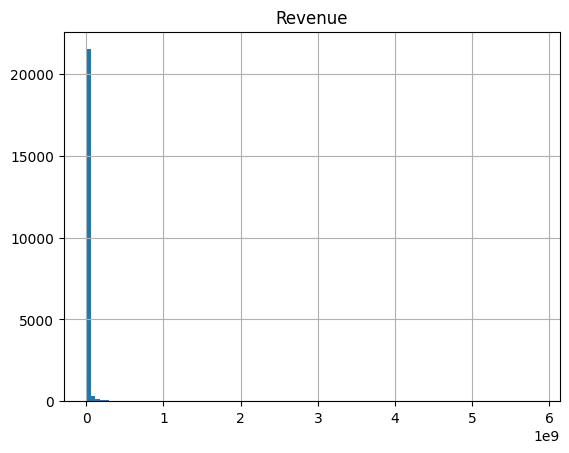

In [9]:
museums.hist(column='Revenue', bins=100)

plt.show()

Ничего не видно :(

Расчехляем логарифм. Нам надо посчитать логарифм для каждого элемента в Revenue.  Можно, конечно сделать цикл, но это плохо и долго!

Для этого рассмотрим полезный метод `apply`:

In [135]:
import math

museums['log_Revenue'] = (
    museums['Revenue']
    .apply(lambda x: math.log10(x) if x>0 else None)
)

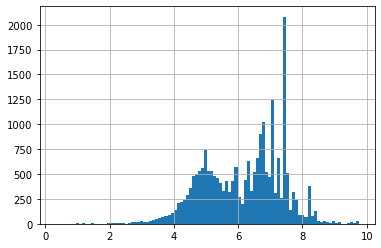

In [136]:

(
    museums['log_Revenue']
    .hist(bins=100)
)

plt.show()

Лучше!

#### apply

In [137]:
df = pd.DataFrame({'x': [1, 2, 3], 'y': [0]*3})

df

,x,y
0,1,0
1,2,0
2,3,0


Что приходит на вход функции в apply?

In [142]:
# столбцы 

def printer(x):
    print("Object: ")
    print(x)
    print()
#     return x ** 2


x = df.apply(printer, axis=0)

Object: 
0    1
1    2
2    3
Name: x, dtype: int64

Object: 
0    0
1    0
2    0
Name: y, dtype: int64



In [143]:
x

x    None
y    None
dtype: object

In [144]:
# строки

x = df.apply(printer, axis=1)

Object: 
x    1
y    0
Name: 0, dtype: int64

Object: 
x    2
y    0
Name: 1, dtype: int64

Object: 
x    3
y    0
Name: 2, dtype: int64



In [145]:
# значения

x = df['x'].apply(printer)

Object: 
1

Object: 
2

Object: 
3



In [146]:
# то есть можно делать все, что с Series

df.apply(lambda x: x*pd.Series([1, 2, 3]))

,x,y
0,1,0
1,4,0
2,9,0


In [147]:
# можно и размер поменять

df.apply(lambda x: x[:2]*pd.Series([1, 2]))

,x,y
0,1,0
1,4,0


Никогда не делайте цикл `for` по строкам `DataFrame`!

`apply` - оптимизированный и будет быстрее (гораздо)

In [148]:
import numpy as np

In [149]:
%%timeit

df = pd.DataFrame({'x': range(1, 1000), 'y': [0]*999})

df['y'] = np.log2(df['x'])

503 µs ± 61.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [150]:
%%timeit

df = pd.DataFrame({'x': range(1, 1000), 'y': [0]*999})

df['y'] = df['x'].apply(lambda x: np.log2(x))

1.47 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [151]:
%%timeit

df = pd.DataFrame({'x': range(1, 1000), 'y': [0]*999})

for idx, i in enumerate(df['x']):
    df.iloc[idx]['y'] = np.log2(i)

42 ms ± 610 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### seaborn

Библиотека красивой визуализации. 

Ставить вот так: https://seaborn.pydata.org/installing.html

In [152]:
import seaborn as sns

sns.set()

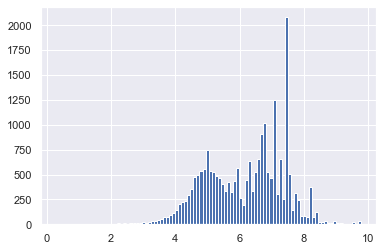

In [153]:
import math

(
    museums['log_Revenue']
    .hist(bins=100)
)

plt.show()

Еще лучше!

/opt/homebrew/Caskroom/miniforge/base/envs/env3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/env3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


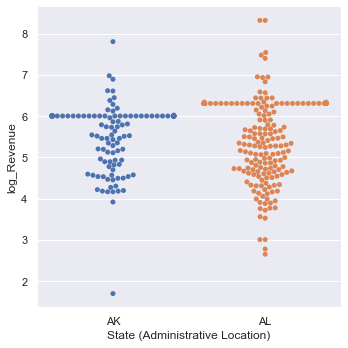

In [154]:
sns.catplot(
    x="State (Administrative Location)", 
    y="log_Revenue", 
    kind="swarm",
    data=museums[
        museums['State (Administrative Location)'].isin(['AK', 'AL'])
    ])

plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/env3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/env3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


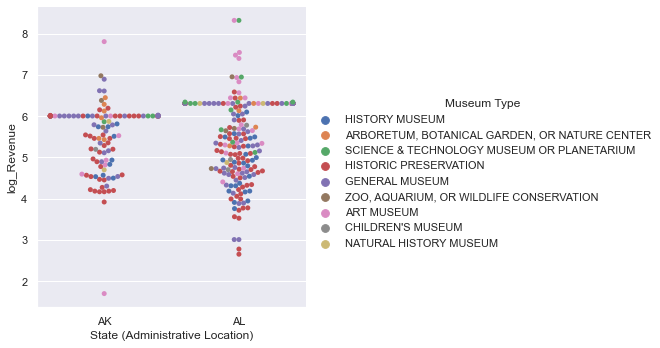

In [155]:
sns.catplot(
    x="State (Administrative Location)", 
    y="log_Revenue", 
    hue='Museum Type',
    kind="swarm",
    data=museums[
        museums['State (Administrative Location)'].isin(['AK', 'AL'])
    ])

plt.show()

In [ ]:
sns.catplot(
    x="State (Administrative Location)", 
    y="log_Revenue", 
    hue='Museum Type',
    kind="swarm",
    data=(
        museums[
            museums['State (Administrative Location)']
            .isin(['AK', 'AL'])]
        .query('log_Revenue < 6')
    )
)

plt.show()

### Джоин

Мы хотим справочник сджоинить с исходным датафреймом:

In [ ]:
museums.head(1)

In [ ]:
states_info.head(1)

In [ ]:
states_info['ShortName'].unique()

In [ ]:
merged = (
    museums
    .merge(
        states_info, 
        left_on='State (Administrative Location)',
        right_on='ShortName',
        how='left'
    )
)

print(museums.shape)
print(merged.shape)
print(merged[merged.ShortName.isnull()].shape)

In [ ]:
merged = (
    museums
    .merge(
        states_info, 
        left_on='State (Administrative Location)',
        right_on='ShortName',
        how='inner'
    )
)

print(museums.shape)
print(merged.shape)
print(merged[merged.ShortName.isnull()].shape)

In [ ]:
merged.head(2)